In [0]:
import tensorflow as tf

In [0]:
from google.colab import drive

In [0]:
from google .colab import files

In [0]:
data=open("content/sample_data/mnist_test.csv","r")

FileNotFoundError: ignored

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}



E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131294 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=of

In [0]:
!mkdir drivers
!google-drive-ocamlfuse drivers
!ls drivers/"dataset"

images	label  Test.odt


In [0]:
f = open("drivers/dataset/Test.odt")

In [0]:
!ls drivers/"dataset"

images	label  Test.odt


In [0]:
import pickle

In [0]:
with open("drivers/dataset/images","rb") as l:
  images=pickle.load(l)

In [0]:
import matplotlib.pyplot as plt

In [0]:
len(images)

1578

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

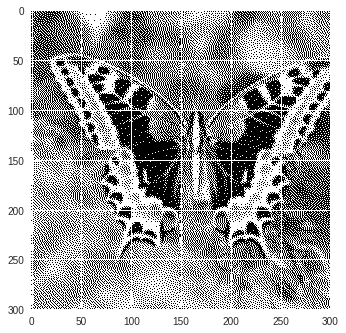

In [0]:
plt.imshow(images[565])

In [0]:
images=np.array(img)

In [0]:
images.shape

(1578, 90000)

In [0]:
img=[]

In [0]:
for i in range(1578):
  img.append(np.reshape(images[i],90000))

In [0]:
with open("drivers/dataset/label","rb") as l:
  label=pickle.load(l)

In [0]:
len(label)

1578

In [0]:
label=np.array(label)

In [0]:
label.shape

(1578,)

In [0]:
label[34]

13

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 10, 10, 1], padding='SAME')

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 20, 20, 1],strides=[1, 10, 10, 1], padding='SAME')

In [0]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [0]:
x = tf.placeholder(tf.float32,shape=[None,90000])

In [0]:
y_true = tf.placeholder(tf.float32,shape=[None,19])

In [0]:
x_image = tf.reshape(x,[-1,300,300,1])

In [0]:
convo_1 = convolutional_layer(x_image,shape=[20,20,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[20,20,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [0]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,10*10*32])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,2048))

In [0]:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
y_pred = normal_full_layer(full_one_dropout,19)

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

In [0]:
def onehotcode(val):
  l=np.zeros(19)
  l[val-1]=1.0
  return l

In [0]:
def batch(size):
  train_y=[]
  train_x=[]
  indexs=np.random.randint(0,1577,size)
  for i in indexs:
    train_x.append(images[i])
    train_y.append(onehotcode(label[i]))
  train_y=np.array(train_y)
  train_x=np.array(train_x)
  return train_x,train_y

In [0]:
steps = 500000

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        batch_x , batch_y = batch(50)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%1000 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            
            test_x,test_y=batch(50)

            print(sess.run(acc,feed_dict={x:test_x,y_true:test_y,hold_prob:1.0}))
            print('\n')

Currently on step 0
Accuracy is:
0.04


Currently on step 1000
Accuracy is:
0.26


Currently on step 2000
Accuracy is:
0.4


Currently on step 3000
Accuracy is:
0.2


Currently on step 4000
Accuracy is:
0.18


Currently on step 5000
Accuracy is:
0.24


Currently on step 6000
Accuracy is:
0.3


Currently on step 7000
Accuracy is:
0.3


Currently on step 8000
Accuracy is:
0.24


Currently on step 9000
Accuracy is:
0.18


Currently on step 10000
Accuracy is:
0.22


Currently on step 11000
Accuracy is:
0.26


Currently on step 12000
Accuracy is:
0.34


Currently on step 13000
Accuracy is:
0.26


Currently on step 14000
Accuracy is:
0.3


Currently on step 15000
Accuracy is:
0.2


Currently on step 16000
Accuracy is:
0.24


Currently on step 17000
Accuracy is:
0.28


Currently on step 18000
Accuracy is:
0.12


Currently on step 19000
Accuracy is:
0.4


Currently on step 20000
Accuracy is:
0.28


Currently on step 21000
Accuracy is:
0.26


Currently on step 22000
Accuracy is:
0.22


Currentl